In [1]:
# Loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


C:\Users\Dnyanesh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Setting the Dataframe so all columns will be visible
pd.set_option('display.max_columns',1000 )
pd.set_option('display.max_rows', 1000)
%matplotlib inline

In [3]:
## Reading the file
covid = pd.read_csv('covid_19_india.csv')

In [4]:
## Let's print the top 5 rows data frame
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [6]:
## Check for any null data
covid.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
# Let's Rename column 

covid.columns = ['Sno','Date','Time','State','Confirmed_Indian_National','Confirmed_Foreign_National','Recovered','Deaths','Confirmed']


In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sno                         1869 non-null   int64 
 1   Date                        1869 non-null   object
 2   Time                        1869 non-null   object
 3   State                       1869 non-null   object
 4   Confirmed_Indian_National   1869 non-null   object
 5   Confirmed_Foreign_National  1869 non-null   object
 6   Recovered                   1869 non-null   int64 
 7   Deaths                      1869 non-null   int64 
 8   Confirmed                   1869 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 131.5+ KB


In [9]:
#  lets drop theses columns as we have statewise total confirmed cases data available.

drop_columns = ['Sno','Confirmed_Indian_National','Confirmed_Foreign_National']
covid.drop(covid[drop_columns],axis=1,inplace=True)

In [10]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1869 non-null   object
 1   Time       1869 non-null   object
 2   State      1869 non-null   object
 3   Recovered  1869 non-null   int64 
 4   Deaths     1869 non-null   int64 
 5   Confirmed  1869 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 87.7+ KB


In [11]:
covid.State.unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Nagaland#', 'Jharkhand#',
       'Dadar Nagar Haveli'], dtype=object)

In [12]:
## Let's do some data cleaning part

covid['State'] = covid['State'].replace('Telengana','Telangana')
covid['State'] = covid['State'].replace('Nagaland#','Nagaland')
covid['State'] = covid['State'].replace('Jharkhand#','Jharkhand')




In [13]:
covid.State.unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli'],
      dtype=object)

In [19]:
len(covid)

1869

In [21]:
## Some of the rows contains Unassigned states so let delete those rows  
covid = covid.loc[covid.State != 'Unassigned']

In [23]:
statewise_cases = covid.groupby('State')['Confirmed','Deaths','Recovered'].max().reset_index()
statewise_cases['Active'] = statewise_cases['Confirmed'] - ( statewise_cases['Deaths'] + statewise_cases['Recovered'] )
statewise_cases = statewise_cases.reindex(['State','Confirmed','Active','Recovered','Deaths'],axis=1)
statewise_cases = statewise_cases.sort_values(by='Confirmed',ascending=False)
statewise_cases.style.background_gradient(cmap='Reds')

,State,Confirmed,Active,Recovered,Deaths
19,Maharashtra,23401,17747,4786,868
10,Gujarat,8541,5248,2780,513
28,Tamil Nadu,8002,5898,2051,53
8,Delhi,7233,5031,2129,73
27,Rajasthan,3988,1611,2264,113
18,Madhya Pradesh,3785,1817,1747,221
31,Uttar Pradesh,3573,1735,1758,80
33,West Bengal,2063,1374,499,190
1,Andhra Pradesh,2018,998,975,45
26,Punjab,1877,1678,168,31


In [24]:
import plotly.graph_objects as go


In [27]:
statewise_cases = statewise_cases.sort_values(by='Confirmed',ascending=False)

fig = go.Figure( data = [ go.Bar( x= statewise_cases['State'] , y=statewise_cases['Confirmed'] , orientation='v',name='Confirmed' ), 
                 #go.Bar( y= statewise_cases['State'] , x=statewise_cases['Active'] , orientation='h',name='Active' ),
                 go.Bar( x= statewise_cases['State'] , y=statewise_cases['Recovered'] , orientation='v',name='Recovered' ),
                 go.Bar( x= statewise_cases['State'] , y=statewise_cases['Deaths'] , orientation='v',name='Deaths', marker={'color':'yellow'} ) ]         
               )

fig.update_layout(barmode='stack',width=900,height=800)
fig.update_traces(textposition='inside')
fig.update_layout(plot_bgcolor='rgb(255,255,255)')
fig.show()


In [28]:
import folium

In [29]:
# Load latitude and Longitude file
State_Lat_Long = pd.read_csv('State_Lat_Long.csv')
State_Lat_Long.columns = ['State','Latitude','Longitude']
State_Lat_Long.head()


,State,Latitude,Longitude
0,Andaman and Nicobar Islands,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [30]:
# Let's Merge latitude & Longitude with Statewise dataframe
statewise_cases = pd.merge(statewise_cases,State_Lat_Long,how='inner',on='State')


In [31]:
statewise_cases

,State,Confirmed,Active,Recovered,Deaths,Latitude,Longitude
0,Maharashtra,23401,17747,4786,868,19.250232,73.160175
1,Gujarat,8541,5248,2780,513,22.258700,71.192400
2,Tamil Nadu,8002,5898,2051,53,12.920386,79.150042
3,Delhi,7233,5031,2129,73,28.669993,77.230004
4,Rajasthan,3988,1611,2264,113,26.449999,74.639981
5,Madhya Pradesh,3785,1817,1747,221,21.300391,76.130019
6,Uttar Pradesh,3573,1735,1758,80,27.599981,78.050006
7,West Bengal,2063,1374,499,190,22.580390,88.329947
8,Andhra Pradesh,2018,998,975,45,14.750429,78.570026
9,Punjab,1877,1678,168,31,31.519974,75.980003


In [32]:
india = folium.Map(location=[20.5937 , 78.9629 ],height=700,tiles="cartodbpositron",zoom_start=5)

In [33]:
for i in range(0,len(statewise_cases)):
    folium.Circle(
        location = [statewise_cases.iloc[i]['Latitude'] , statewise_cases.iloc[i]['Longitude']],
        #tooltip = statewise_cases.iloc[i]['State'],
        tooltip = ('<strong>State</strong>: ' + str(statewise_cases.iloc[i]['State']) + '<br>'
                 '<strong>Confirmed</strong>: ' + str(statewise_cases.iloc[i]['Confirmed']) + '<br>'
                 '<strong>Active</strong>: ' + str(statewise_cases.iloc[i]['Active']) + '<br>'
                 '<strong>Recovered</strong>: ' + str(statewise_cases.iloc[i]['Recovered']) + '<br>'
                 '<strong>Death</strong>: ' + str(statewise_cases.iloc[i]['Deaths']) + '<br>'),
        radius = (int(np.log2(statewise_cases.iloc[i]['Confirmed'])))*9000,
        #radius = 15000,
        popup = ('<strong>State</strong>: ' + str(statewise_cases.iloc[i]['State']) + '<br>'
                 '<strong>Confirmed</strong>: ' + str(statewise_cases.iloc[i]['Confirmed']) + '<br>'
                 '<strong>Active</strong>: ' + str(statewise_cases.iloc[i]['Active']) + '<br>'
                 '<strong>Recovered</strong>: ' + str(statewise_cases.iloc[i]['Recovered']) + '<br>'
                 '<strong>Death</strong>: ' + str(statewise_cases.iloc[i]['Deaths']) + '<br>'),
        color='red',
        fill_color='red',
        fill=True).add_to(india)

In [34]:
india

In [35]:
covid['Date'] = pd.to_datetime(covid['Date'],format='%d/%m/%y')

In [36]:
## Let's plot pattern of 'Confirmed','Recovered' & 'Deaths' cases daywise
daywise_cases = covid.groupby('Date')['Confirmed','Recovered','Deaths'].sum().reset_index()
daywise_cases.head()

,Date,Confirmed,Recovered,Deaths
0,2020-01-30,1,0,0
1,2020-01-31,1,0,0
2,2020-02-01,2,0,0
3,2020-02-02,3,0,0
4,2020-02-03,3,0,0


In [37]:
fig = go.Figure( data = [ go.Scatter(x=daywise_cases['Date'],y=daywise_cases['Confirmed'],mode='lines+markers',marker_color='Red',name='Confirmed'),
                          go.Scatter(x=daywise_cases['Date'],y=daywise_cases['Recovered'],mode='lines+markers',marker_color='Green',name='Recovered'),
                          go.Scatter(x=daywise_cases['Date'],y=daywise_cases['Deaths'],mode='lines+markers',marker_color='Yellow',name='Deaths') ])

fig.update_layout(title_text='India Day wise Cases',plot_bgcolor='rgb(255,255,255)',xaxis_title='Date',yaxis_title='No. of Cases')
#fig.update_xaxes('Date')
fig.show()



## Top 10 States Statistics 

In [38]:

Top19_States = statewise_cases.loc[:,['State','Confirmed','Active','Recovered','Deaths']].sort_values(by='Confirmed',ascending=False).head(10)
Top19_States


,State,Confirmed,Active,Recovered,Deaths
0,Maharashtra,23401,17747,4786,868
1,Gujarat,8541,5248,2780,513
2,Tamil Nadu,8002,5898,2051,53
3,Delhi,7233,5031,2129,73
4,Rajasthan,3988,1611,2264,113
5,Madhya Pradesh,3785,1817,1747,221
6,Uttar Pradesh,3573,1735,1758,80
7,West Bengal,2063,1374,499,190
8,Andhra Pradesh,2018,998,975,45
9,Punjab,1877,1678,168,31


In [39]:
States_lst = list(Top19_States['State'])
States_lst

['Maharashtra',
 'Gujarat',
 'Tamil Nadu',
 'Delhi',
 'Rajasthan',
 'Madhya Pradesh',
 'Uttar Pradesh',
 'West Bengal',
 'Andhra Pradesh',
 'Punjab']

In [40]:
from plotly.subplots import make_subplots
#shared_yaxes=True,

In [34]:
#fig = make_subplots(rows=5,cols=2,subplot_titles=(States_lst[0],States_lst[1],States_lst[2],States_lst[3],States_lst[4],States_lst[5],States_lst[6],States_lst[7],States_lst[8],States_lst[9]))


In [41]:
fig = make_subplots(rows=5,cols=2,subplot_titles=(States_lst[0],States_lst[1],States_lst[2],States_lst[3],States_lst[4],States_lst[5],States_lst[6],States_lst[7],States_lst[8],States_lst[9]))

r = 1

for i in range(0,10,2):
    fig.add_trace( go.Scatter(x=covid.loc[(covid.State == States_lst[i] ),'Date'],y=covid.loc[(covid.State == States_lst[i]),'Confirmed'],mode='lines+markers',marker_color='Red',name='Confirmed',showlegend=False),row =r ,col = 1)
    fig.add_trace( go.Scatter(x=covid.loc[(covid.State == States_lst[i] ),'Date'],y=covid.loc[(covid.State == States_lst[i]),'Recovered'],mode='lines+markers',marker_color='Green',name='Recovered',showlegend=False),row =r ,col = 1)
    fig.add_trace( go.Scatter(x=covid.loc[(covid.State == States_lst[i] ),'Date'],y=covid.loc[(covid.State == States_lst[i]),'Deaths'],mode='lines+markers',marker_color='Yellow',name='Deaths',showlegend=False),row =r ,col = 1)

    fig.add_trace( go.Scatter(x=covid.loc[(covid.State == States_lst[i+1] ),'Date'],y=covid.loc[(covid.State == States_lst[i+1]),'Confirmed'],mode='lines+markers',marker_color='Red',name='Confirmed',showlegend=False),row =r ,col = 2) 
    fig.add_trace( go.Scatter(x=covid.loc[(covid.State == States_lst[i+1] ),'Date'],y=covid.loc[(covid.State == States_lst[i+1]),'Recovered'],mode='lines+markers',marker_color='Green',name='Recovered',showlegend=False),row =r ,col = 2)
    fig.add_trace( go.Scatter(x=covid.loc[(covid.State == States_lst[i+1] ),'Date'],y=covid.loc[(covid.State == States_lst[i+1]),'Deaths'],mode='lines+markers',marker_color='Yellow',name='Deaths',showlegend=False),row =r ,col = 2)
    
    r=r+1

fig.update_layout(width=900,height=1700)
fig.update_layout(xaxis_title='Date',yaxis_title='No. of Cases')
fig.show()



In [43]:
## Let's explore the Districts of Maharashtra

individual_det = pd.read_csv('IndividualDetails.csv')

In [44]:
 ## Here will focus on only on Maharashtra State so let's filter the data
maharashtra = individual_det.loc[(individual_det.detected_state == 'Maharashtra')]


In [45]:
maharashtra.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
43,43,NaN,09/03/2020,NaN,M,Pune,Pune,Maharashtra,India,Recovered,25/03/2020,"Travelled from Dubai on 1 March, Husband of P45"
44,44,NaN,09/03/2020,NaN,F,Pune,Pune,Maharashtra,India,Recovered,25/03/2020,"Travelled from Dubai on 1 March, Wife of P44"
59,59,NaN,10/03/2020,3,F,Pune,Pune,Maharashtra,India,Hospitalized,10/03/2020,Daughter of P44 & P45
60,60,NaN,10/03/2020,NaN,NaN,Pune,Pune,Maharashtra,India,Hospitalized,10/03/2020,Co-passenger with P44 & P45 in cab of P62 from...
61,61,NaN,10/03/2020,NaN,M,Pune,Pune,Maharashtra,India,Hospitalized,10/03/2020,"Cab driver who ferried P44, P45, P61 from Mumb..."


In [46]:
maharashtra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 43 to 27205
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  8068 non-null   int64 
 1   government_id       2 non-null      object
 2   diagnosed_date      8068 non-null   object
 3   age                 60 non-null     object
 4   gender              78 non-null     object
 5   detected_city       979 non-null    object
 6   detected_district   4274 non-null   object
 7   detected_state      8068 non-null   object
 8   nationality         105 non-null    object
 9   current_status      8068 non-null   object
 10  status_change_date  7970 non-null   object
 11  notes               7671 non-null   object
dtypes: int64(1), object(11)
memory usage: 819.4+ KB


In [47]:
maharashtra.isnull().sum()

id                       0
government_id         8066
diagnosed_date           0
age                   8008
gender                7990
detected_city         7089
detected_district     3794
detected_state           0
nationality           7963
current_status           0
status_change_date      98
notes                  397
dtype: int64

In [42]:
## Let's drop unwanted columns

drop_col = ['id','government_id','age','gender','nationality','notes']

maharashtra.drop(maharashtra[drop_col],axis=1,inplace=True)



In [43]:
maharashtra.head()

,diagnosed_date,detected_city,detected_district,detected_state,current_status,status_change_date
43,09/03/2020,Pune,Pune,Maharashtra,Recovered,25/03/2020
44,09/03/2020,Pune,Pune,Maharashtra,Recovered,25/03/2020
59,10/03/2020,Pune,Pune,Maharashtra,Hospitalized,10/03/2020
60,10/03/2020,Pune,Pune,Maharashtra,Hospitalized,10/03/2020
61,10/03/2020,Pune,Pune,Maharashtra,Hospitalized,10/03/2020


In [44]:
maharashtra.isnull().sum()

diagnosed_date           0
detected_city         1465
detected_district        0
detected_state           0
current_status           0
status_change_date      98
dtype: int64

In [45]:
maharashtra.detected_district.value_counts()

Mumbai           1146
Pune              257
Thane             143
Sangli             26
Ahmadnagar         26
Nagpur             25
Aurangabad         19
Palghar            18
Nashik             14
Buldana            13
Akola              12
Other States*       9
Latur               8
Raigarh             7
Satara              6
Kolhapur            6
Ratnagiri           5
Yavatmal            4
Amravati            4
Osmanabad           4
Jalgaon             2
Dhule               1
Hingoli             1
Gondiya             1
Sindhudurg          1
Washim              1
Jalna               1
Bid                 1
Name: detected_district, dtype: int64

In [46]:
## As some of the district data is blank but it have City data so let's impute district with City 
## [ As we saw in one of the entry contains city as Mumbai and district as Others States*]

maharashtra.loc[(maharashtra.detected_district == 'Other States*')]

,diagnosed_date,detected_city,detected_district,detected_state,current_status,status_change_date
848,27/03/2020,Mumbai,Other States*,Maharashtra,Hospitalized,27/03/2020
3042,04/04/2020,NaN,Other States*,Maharashtra,Hospitalized,03/04/2020
6702,09/04/2020,NaN,Other States*,Maharashtra,Hospitalized,09/04/2020
6703,09/04/2020,NaN,Other States*,Maharashtra,Hospitalized,09/04/2020
6704,09/04/2020,NaN,Other States*,Maharashtra,Hospitalized,09/04/2020
6705,09/04/2020,NaN,Other States*,Maharashtra,Hospitalized,09/04/2020
6706,09/04/2020,NaN,Other States*,Maharashtra,Hospitalized,09/04/2020
6707,09/04/2020,NaN,Other States*,Maharashtra,Hospitalized,09/04/2020
7555,10/04/2020,NaN,Other States*,Maharashtra,Hospitalized,10/04/2020


In [47]:
## For those rows where detected_city is "Mumbai" and detected_district as "Other States*" let update district as "Mumbai"
maharashtra.loc[((maharashtra.detected_district == "Other States*") & (maharashtra.detected_city.isnull() == False)),'detected_district'] = maharashtra.loc[((maharashtra.detected_district == "Other States*") & (maharashtra.detected_city.isnull() == False)),'detected_city']


In [48]:
### If City is NAN and detected_district is "Other States*" let's drop those rows 
maharashtra = maharashtra.loc[~(maharashtra.detected_district == 'Other States*')]


In [49]:
maharashtra.isnull().sum()

diagnosed_date           0
detected_city         1457
detected_district        0
detected_state           0
current_status           0
status_change_date      98
dtype: int64

In [50]:
## Convert date fields to datetime
maharashtra['diagnosed_date'] = pd.to_datetime(maharashtra['diagnosed_date'],format='%d/%m/%Y')
maharashtra['status_change_date'] = pd.to_datetime(maharashtra['status_change_date'],format='%d/%m/%Y')

In [51]:
maharashtra_district = maharashtra.groupby(['diagnosed_date','detected_district'])['current_status'].count().reset_index()
maharashtra_district.columns = ['diagnosed_date','detected_district','count']
maharashtra_district.head()


,diagnosed_date,detected_district,count
0,2020-03-09,Pune,2
1,2020-03-10,Pune,3
2,2020-03-11,Mumbai,2
3,2020-03-11,Nagpur,1
4,2020-03-11,Pune,3


In [52]:
#state_color = ['Red','Blue','Green','Yellow','Grey']

In [53]:
uniq_district_list = list(maharashtra_district.detected_district.unique())

In [54]:
#uniq_district_list = uniq_district_list[:5]
uniq_district_list

['Pune',
 'Mumbai',
 'Nagpur',
 'Ahmadnagar',
 'Raigarh',
 'Thane',
 'Yavatmal',
 'Aurangabad',
 'Ratnagiri',
 'Palghar',
 'Sangli',
 'Satara',
 'Sindhudurg',
 'Gondiya',
 'Kolhapur',
 'Buldana',
 'Jalgaon',
 'Nashik',
 'Osmanabad',
 'Washim',
 'Amravati',
 'Hingoli',
 'Latur',
 'Jalna',
 'Akola',
 'Bid',
 'Dhule']

In [55]:
## Adding new columns which contains cummulative sum for each district
maharashtra_district['CumSum'] = 0.0

for i in range(len(uniq_district_list)):
    lst = list(maharashtra_district.loc[(maharashtra_district.detected_district == uniq_district_list[i]),'count'].cumsum())
    maharashtra_district.loc[(maharashtra_district.detected_district == uniq_district_list[i]),'CumSum'] = lst
    lst.clear()


In [56]:
maharashtra_district.isnull().sum()

diagnosed_date       0
detected_district    0
count                0
CumSum               0
dtype: int64

In [57]:
#maharashtra_district.drop('CumSum',axis=1,inplace=True)

In [58]:
## Let's plot Maharashtra districtwise cases

fig = go.Figure()

for i in range(len(uniq_district_list)):
    fig.add_trace(go.Scatter(x=maharashtra_district.loc[(maharashtra_district.detected_district == uniq_district_list[i]),'diagnosed_date'],y=maharashtra_district.loc[(maharashtra_district.detected_district == uniq_district_list[i]),'CumSum'], mode='lines+markers',name=uniq_district_list[i]))
                    
fig.update_layout(title_text='Maharashtra Districts Day wise Cases',plot_bgcolor='rgb(255,255,245)')
fig.show()               
                  

In [59]:
maharashtra_district.head()

,diagnosed_date,detected_district,count,CumSum
0,2020-03-09,Pune,2,2.0
1,2020-03-10,Pune,3,5.0
2,2020-03-11,Mumbai,2,2.0
3,2020-03-11,Nagpur,1,1.0
4,2020-03-11,Pune,3,8.0


In [60]:
#import squarify
#import matplotlib

In [61]:
## Let's focus on Mumbai and build model 

fig = go.Figure( data = [ go.Scatter(x=maharashtra_district.loc[(maharashtra_district.detected_district == "Mumbai"),'diagnosed_date'],y=maharashtra_district.loc[(maharashtra_district.detected_district == "Mumbai"),'CumSum'], mode='lines+markers',name='Mumbai Datewise Cummulative Cases'),
                          go.Scatter(x=maharashtra_district.loc[(maharashtra_district.detected_district == "Mumbai"),'diagnosed_date'],y=maharashtra_district.loc[(maharashtra_district.detected_district == "Mumbai"),'count'], mode='lines+markers',name='Mumbai Daily Cases') ])
                    
fig.update_layout(title_text='Mumbai Daily / Cummulative Cases',plot_bgcolor='rgb(255,255,255)')
fig.update_layout(showlegend=True)
fig.update_layout(xaxis_title='Date',yaxis_title='No. of Cases',title_text='Mumbai Daily Individual / Cummulative Cases')
fig.show() 


## Create Seperate dataframe for Mumbai

In [62]:
Mumbai_district = maharashtra_district.loc[(maharashtra_district.detected_district == 'Mumbai')]

In [63]:
Mumbai_district.drop('detected_district',axis=1,inplace=True)
Mumbai_district.columns = ['Date','Cases','Cummulative']
Mumbai_district.head()

,Date,Cases,Cummulative
2,2020-03-11,2,2.0
5,2020-03-12,2,4.0
10,2020-03-14,1,5.0
17,2020-03-16,1,6.0
21,2020-03-17,1,7.0


In [64]:
## For Future Test Purpose we create new dataframe which holds all future dates
Mumbai_district['Date'].max()

Timestamp('2020-04-11 00:00:00')

In [65]:
future_dates = []

for i in range(1,30):
    future_dates.append(Mumbai_district['Date'].max() + pd.DateOffset(days=i))

Test_Date = pd.DataFrame({"Future_Date":future_dates})

Test_Date.head()

,Future_Date
0,2020-04-12
1,2020-04-13
2,2020-04-14
3,2020-04-15
4,2020-04-16


## Build Model 

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import datetime as dt
from sklearn import metrics

### Training Data

In [67]:
X = Mumbai_district['Date']
y = np.array(Mumbai_district['Cases'])

### Testing Data

In [68]:
X_test = Test_Date['Future_Date']

## convert date into ordinal form difference from 01/01/1900

In [69]:
X = X.map(dt.datetime.toordinal)

X_test = X_test.map(dt.datetime.toordinal)

In [70]:
X = np.array(X)
X_test = np.array(X_test)

print(X)
print('-------------------------------')
print(X_test)

[737495 737496 737498 737500 737501 737502 737503 737504 737505 737506
 737507 737508 737509 737510 737511 737512 737513 737514 737515 737516
 737517 737518 737519 737520 737521 737522 737523 737524 737525 737526]
-------------------------------
[737527 737528 737529 737530 737531 737532 737533 737534 737535 737536
 737537 737538 737539 737540 737541 737542 737543 737544 737545 737546
 737547 737548 737549 737550 737551 737552 737553 737554 737555]


In [71]:
## Reshaping the training data
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [72]:
## Reshaping the Testing data
X_test = X_test.reshape(-1,1)

In [73]:
print(X.shape)
print(y.shape)
print(X_test.shape)

(30, 1)
(30, 1)
(29, 1)


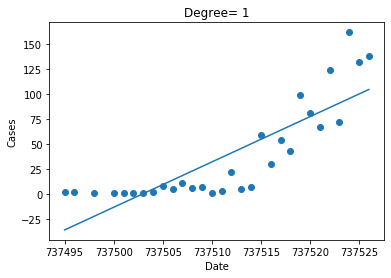

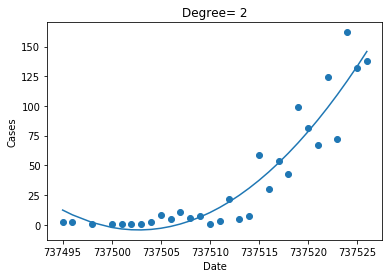

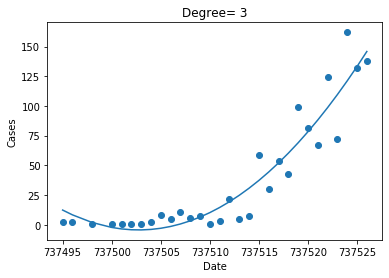

In [74]:
degrees = [1,2,3]
r2_train = []

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),('model', LinearRegression())])
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    r2_train.append(metrics.r2_score(y, y_pred))
    
# plot predictions and actual values against year
    fig, ax = plt.subplots()
    ax.set_xlabel("Date")                                
    ax.set_ylabel("Cases")
    ax.set_title("Degree= " + str(degree))
    
    # train data in blue
    ax.scatter(X, y)
    ax.plot(X, y_pred)

    
    plt.show()

In [75]:
## R2 Score for Training dataset
print(r2_train)

[0.6996224920401061, 0.888236442740716, 0.888236916353764]


In [76]:
## Build the Final Model with Degree=3 [ Even it is now going from all the datapoints but as we need to build generalize model
## so it looks good with degree = 3. ]

pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=3)),('model', LinearRegression())])
pipeline.fit(X, y)
y_pred = pipeline.predict(X)

Mumbai_district['Predicted'] = y_pred
Mumbai_district['Predicted'] = Mumbai_district['Predicted'].astype(int)

In [77]:
### Let's Predict for Future dates

y_future_predict = pipeline.predict(X_test)

## Store the results in the Test Date dataframe

Test_Date['Predicted_Cases'] = y_future_predict
Test_Date['Predicted_Cases'] = Test_Date['Predicted_Cases'].astype(int)


In [78]:
Mumbai_district.head()

,Date,Cases,Cummulative,Predicted
2,2020-03-11,2,2.0,12
5,2020-03-12,2,4.0,8
10,2020-03-14,1,5.0,1
17,2020-03-16,1,6.0,-2
21,2020-03-17,1,7.0,-3


In [79]:
Test_Date.head()

,Future_Date,Predicted_Cases
0,2020-04-12,158
1,2020-04-13,172
2,2020-04-14,187
3,2020-04-15,201
4,2020-04-16,217


In [80]:
## COnvert into One-dimentional array
#predicted_output = predicted_output.flatten()

In [81]:
## Let's perform Cummulative on Predictions
Mumbai_district['Cummulative_Predicted'] = Mumbai_district['Predicted'].cumsum()
Mumbai_district.head()

,Date,Cases,Cummulative,Predicted,Cummulative_Predicted
2,2020-03-11,2,2.0,12,12
5,2020-03-12,2,4.0,8,20
10,2020-03-14,1,5.0,1,21
17,2020-03-16,1,6.0,-2,19
21,2020-03-17,1,7.0,-3,16


In [82]:
## Let's perform Cummulative on Test Predictions
Test_Date['Cummulative_Predicted'] = Test_Date['Predicted_Cases'].cumsum()
Test_Date.head()

,Future_Date,Predicted_Cases,Cummulative_Predicted
0,2020-04-12,158,158
1,2020-04-13,172,330
2,2020-04-14,187,517
3,2020-04-15,201,718
4,2020-04-16,217,935


In [83]:
fig = go.Figure( data = [ go.Scatter(x=Mumbai_district['Date'],y=Mumbai_district['Cases'],mode='lines+markers',marker_color='Red',name='No. of Actual Case Daywise'),
                          go.Scatter(x=Mumbai_district['Date'],y=Mumbai_district['Cummulative'],mode='lines+markers',marker_color='Green',name='Cummulative Total of Cases Daywise'),
                          go.Scatter(x=Mumbai_district['Date'],y=Mumbai_district['Predicted'],line=dict(color='yellow', width=4, dash='dot'),marker_color='Yellow',name='No. of Cases Predicted Daywise'),
                          go.Scatter(x=Mumbai_district['Date'],y=Mumbai_district['Cummulative_Predicted'],line=dict(color='royalblue', width=4, dash='dot'),name='Cummulative Total of Predicted Cases Daywise')]) 

fig.update_layout(title_text='Mumbai Day wise Cases',plot_bgcolor='rgb(255,255,255)')
fig.show()

In [84]:
Mumbai_district['Cummulative_Predicted'].max()



1141

In [85]:
### For Cummulative we need to add previous days cumulative values to future dates 
Test_Date['Cummulative_Predicted'] = Test_Date['Cummulative_Predicted'] + Mumbai_district['Cummulative_Predicted'].max()
Test_Date

,Future_Date,Predicted_Cases,Cummulative_Predicted
0,2020-04-12,158,1299
1,2020-04-13,172,1471
2,2020-04-14,187,1658
3,2020-04-15,201,1859
4,2020-04-16,217,2076
5,2020-04-17,233,2309
6,2020-04-18,249,2558
7,2020-04-19,266,2824
8,2020-04-20,284,3108
9,2020-04-21,302,3410


In [86]:
## Prediction for Future Dates
Test_Date

,Future_Date,Predicted_Cases,Cummulative_Predicted
0,2020-04-12,158,1299
1,2020-04-13,172,1471
2,2020-04-14,187,1658
3,2020-04-15,201,1859
4,2020-04-16,217,2076
5,2020-04-17,233,2309
6,2020-04-18,249,2558
7,2020-04-19,266,2824
8,2020-04-20,284,3108
9,2020-04-21,302,3410


In [87]:
fig = go.Figure( data = [ go.Scatter(x=Mumbai_district['Date'],y=Mumbai_district['Cases'],mode='lines+markers',marker_color='Red',name='No. of Actual Case Daywise'),
                          go.Scatter(x=Mumbai_district['Date'],y=Mumbai_district['Predicted'],line=dict(color='yellow', width=4, dash='dot'),name='Predicted No. of Cases Daywise'),
                          go.Scatter(x=Test_Date['Future_Date'],y=Test_Date['Predicted_Cases'],line=dict(color='royalblue', width=4, dash='dot'),name='No. of Predicted Cases for Future Dates')]) 

fig.update_layout(title_text='No. of Actual / Predicted Cases Daywise',plot_bgcolor='rgb(255,255,255)',xaxis_title='Date',yaxis_title='No. of Cases')

fig.show()

In [88]:
fig = go.Figure( data = [ go.Scatter(x=Mumbai_district['Date'],y=Mumbai_district['Cummulative'],mode='lines+markers',marker_color='Red',name='Cummulative Total of Cases Daywise'),
                          go.Scatter(x=Mumbai_district['Date'],y=Mumbai_district['Cummulative_Predicted'],line=dict(color='Yellow', width=4, dash='dot'),name='Cummulative Total of Predicted Cases Daywise'),
                          go.Scatter(x=Test_Date['Future_Date'],y=Test_Date['Cummulative_Predicted'],line=dict(color='royalblue', width=4, dash='dot'),name='Cummulative Total of Predicted Cases Daywise for Future Dates')  ])
fig.update_layout(title_text='Cumulative No. of Cases Daywise',plot_bgcolor='rgb(255,255,255)',xaxis_title='Date',yaxis_title='No. of Cases')
fig.show()

### Let's build the model for Maharashtra

In [89]:
state = maharashtra_district.copy()

In [90]:
## Count Datewise

state = state.groupby('diagnosed_date')['count'].sum().reset_index()
state.columns = ['Date','Cases']
state

,Date,Cases
0,2020-03-09,2
1,2020-03-10,3
2,2020-03-11,6
3,2020-03-12,3
4,2020-03-13,3
5,2020-03-14,9
6,2020-03-15,6
7,2020-03-16,7
8,2020-03-17,2
9,2020-03-18,4


In [91]:
fig = go.Figure( data = [ go.Scatter(x=state['Date'],y=state['Cases'],mode='lines+markers',marker_color='Red',name='No. of Actual Case Daywise') ])

fig.update_layout(title_text='Maharashtra No. of Actual Cases Daywise',plot_bgcolor='rgb(255,255,255)',xaxis_title='Date',yaxis_title='No. of Cases')

fig.show()

In [92]:
X_train = state['Date']
y_train = state['Cases']

In [93]:
X_train = X_train.map(dt.datetime.toordinal)

In [94]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [95]:
## Reshaping the training data
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)


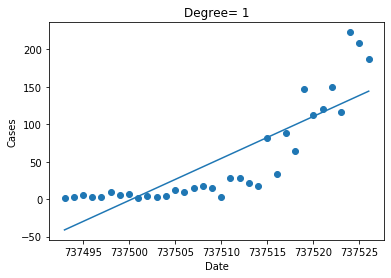

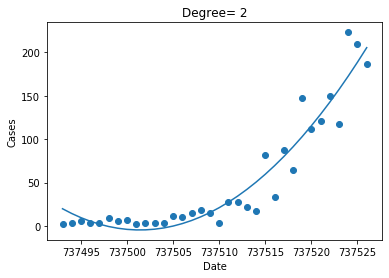

In [96]:
degrees = [1,2]
r2_train = []

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),('model', LinearRegression())])
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    r2_train.append(metrics.r2_score(y_train, y_train_pred))
    
# plot predictions and actual values against year
    fig, ax = plt.subplots()
    ax.set_xlabel("Date")                                
    ax.set_ylabel("Cases")
    ax.set_title("Degree= " + str(degree))
    
    # train data in blue
    ax.scatter(X_train, y_train)
    ax.plot(X_train, y_train_pred)

    
    plt.show()

In [97]:
print(r2_train)

[0.7062172607165271, 0.9126103118097254]


In [98]:
## Let's create cummulative column for actual cases
state['Cummulative_Actual'] = state['Cases'].cumsum()

In [99]:
## Build the model
pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=2)),('model', LinearRegression())])
pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)


In [100]:
## Add output into dataframe
state['Predicted_Cases'] = y_train_pred
state['Predicted_Cases'] = state['Predicted_Cases'].astype(int)

In [101]:
### Create cummulative based on Predicted value
state['Cummulative_Predictive'] = state['Predicted_Cases'].cumsum()

In [102]:
state.head()

,Date,Cases,Cummulative_Actual,Predicted_Cases,Cummulative_Predictive
0,2020-03-09,2,2,19,19
1,2020-03-10,3,5,14,33
2,2020-03-11,6,11,9,42
3,2020-03-12,3,14,5,47
4,2020-03-13,3,17,2,49


In [103]:
## Let's plot output
fig = go.Figure( data = [ go.Scatter(x=state['Date'],y=state['Cases'],mode='lines+markers',marker_color='Red',name='No. of Cases Daywise'),
                          go.Scatter(x=state['Date'],y=state['Cummulative_Actual'],mode='lines+markers',marker_color='violet',name='Cummulative Total Cases Daywise'),
                          go.Scatter(x=state['Date'],y=state['Predicted_Cases'],line=dict(color='Yellow', width=4, dash='dot'),name='No. of Predicted Cases Daywise'),
                          go.Scatter(x=state['Date'],y=state['Cummulative_Predictive'],line=dict(color='royalblue', width=4, dash='dot'),name='Cummulative Total of Predicted Cases Daywise')  ])
fig.update_layout(title_text='Maharashtra Actual/Predicted Cases Daywise',plot_bgcolor='rgb(255,255,255)',xaxis_title='Date',yaxis_title='No. of Cases')
fig.show()

In [104]:
### Let's Predict for Future Dates so creating datafrane which contains future dates
future_dates = []

for i in range(1,30):
    future_dates.append(state['Date'].max() + pd.DateOffset(days=i))

Future_Date = pd.DataFrame({"Future_Date":future_dates})

Future_Date.head()


,Future_Date
0,2020-04-12
1,2020-04-13
2,2020-04-14
3,2020-04-15
4,2020-04-16


In [105]:
## Assign to variable X_test
X_test = Future_Date['Future_Date']

## Convert date into ordinal
X_test = X_test.map(dt.datetime.toordinal)

## Convert into array
X_test = np.array(X_test)

## Reshaping the array
X_test = X_test.reshape(-1,1)

In [106]:
## Let's predict the Test values
y_test_predict = pipeline.predict(X_test)

## Store the result into dataframe
Future_Date['Predicted_Cases'] = y_test_predict

## Convert into integer
Future_Date['Predicted_Cases'] = Future_Date['Predicted_Cases'].astype(int)

## Create cummulative column based on prediction
Future_Date['Cummulative_Predicted'] = Future_Date['Predicted_Cases'].cumsum()

## Adding Previous day cummulative sum to all
Future_Date['Cummulative_Predicted'] = Future_Date['Cummulative_Predicted'] + state['Cummulative_Predictive'].max()



In [107]:
state.head()

,Date,Cases,Cummulative_Actual,Predicted_Cases,Cummulative_Predictive
0,2020-03-09,2,2,19,19
1,2020-03-10,3,5,14,33
2,2020-03-11,6,11,9,42
3,2020-03-12,3,14,5,47
4,2020-03-13,3,17,2,49


In [108]:
Future_Date

,Future_Date,Predicted_Cases,Cummulative_Predicted
0,2020-04-12,222,1966
1,2020-04-13,240,2206
2,2020-04-14,259,2465
3,2020-04-15,279,2744
4,2020-04-16,299,3043
5,2020-04-17,320,3363
6,2020-04-18,341,3704
7,2020-04-19,363,4067
8,2020-04-20,386,4453
9,2020-04-21,410,4863


In [109]:
## Let's plot output
fig = go.Figure( data = [ go.Scatter(x=state['Date'],y=state['Cases'],mode='lines+markers',marker_color='Red',name='No. of Cases Daywise'),
                          go.Scatter(x=Future_Date['Future_Date'],y=Future_Date['Predicted_Cases'],line=dict(color='Yellow', width=4, dash='dot'),name='No. of Predicted Cases Daywise for Future Dates'),
                          go.Scatter(x=state['Date'],y=state['Cummulative_Actual'],mode='lines+markers',marker_color='violet',name='Cummulative Total Cases Daywise'),
                          go.Scatter(x=Future_Date['Future_Date'],y=Future_Date['Cummulative_Predicted'],line=dict(color='royalblue', width=4, dash='dot'),name='Cummulative Total Daywise for Future Dates')  ])
fig.update_layout(title_text='Maharashtra Actual/Predicted Cases Daywise',plot_bgcolor='rgb(255,255,255)',xaxis_title='Date',yaxis_title='No. of Cases')
fig.show()

In [2]:
print('Dnyanesh')
os.system('cls')

Dnyanesh


0